sur le jeu de train : mean_train_absolute_error=28.42
sur le jeu de test : mean_test_absolute_error=39.80


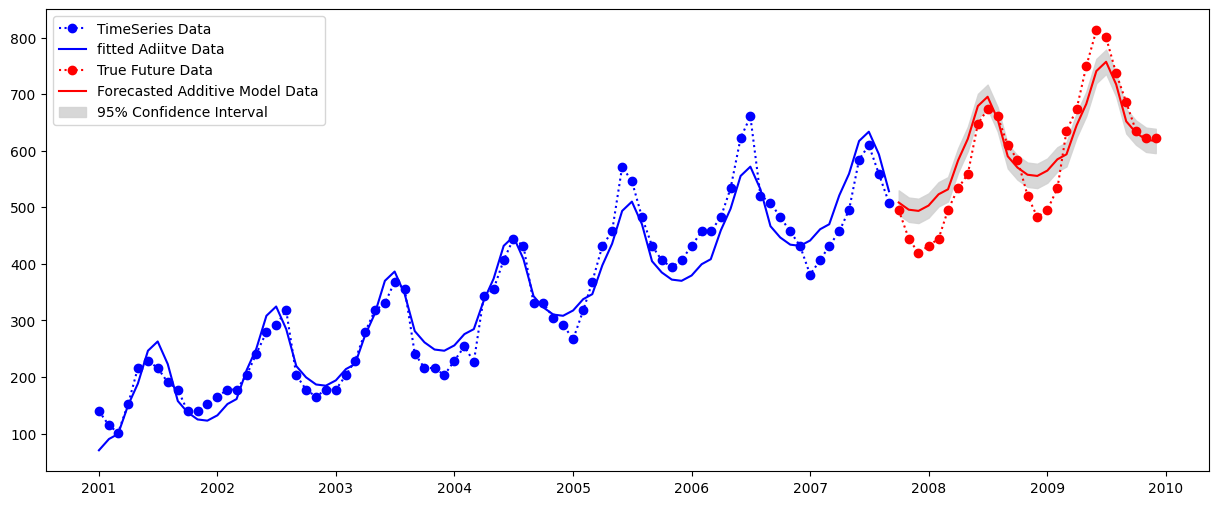

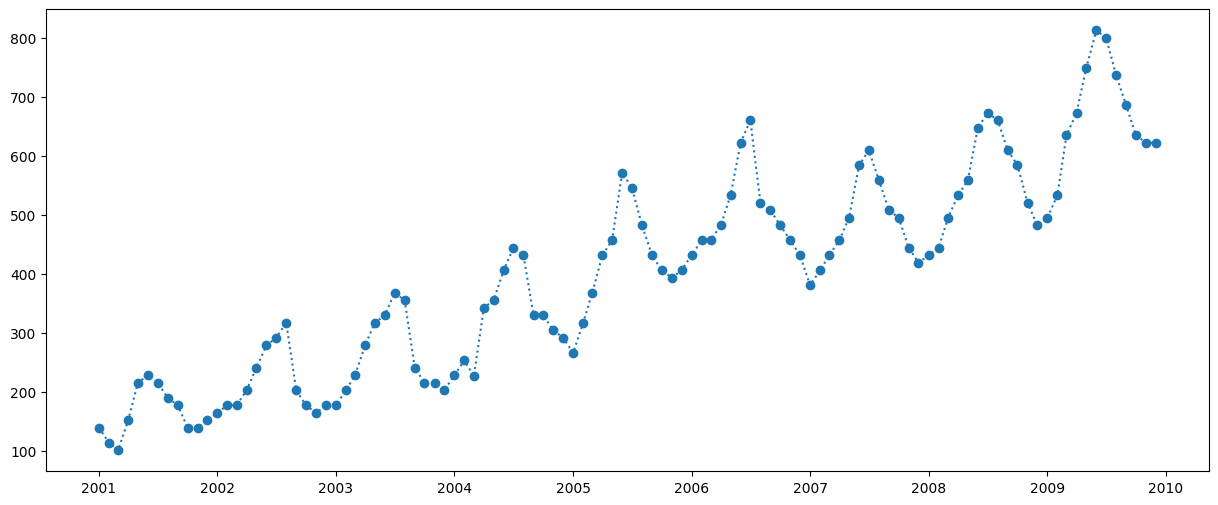

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

class DataPreparation:
    def __init__(self, csv_path):
        self.dataset_df = pd.read_csv(csv_path)
        self.prepare_data()

    def prepare_data(self):
        number_of_rows = len(self.dataset_df)
        self.dataset_df["index_mesure"] = np.arange(0, number_of_rows, 1)

        self.dataset_df["Years"] = pd.to_datetime(self.dataset_df["Years"], format='%m/%d/%Y')
        self.dataset_df["Years_name"] = self.dataset_df["Years"].dt.strftime('%B')
        boolean_df = pd.get_dummies(self.dataset_df["Years_name"])

        self.dataset_df = self.dataset_df.join(boolean_df)

        self.dataset_train_df = self.dataset_df.iloc[:int(number_of_rows*0.75)]
        self.dataset_test_df = self.dataset_df.iloc[int(number_of_rows*0.75):]

        self.x_train = self.dataset_train_df[['index_mesure'] + list(boolean_df.columns)].values
        self.y_train = self.dataset_train_df[['Sales']].values

        self.x_test = self.dataset_test_df[['index_mesure'] + list(boolean_df.columns)].values
        self.y_test = self.dataset_test_df[['Sales']].values

    def show_graph(self):
        plt.figure(figsize=(15, 6))
        plt.plot(self.dataset_df["Years"], self.dataset_df["Sales"], "o:")
        
        plt.show()

class Regression:
    def __init__(self, data_preparation_object):
        self.data_preparation_object = data_preparation_object
        self.model = LinearRegression()

        self.model.fit(data_preparation_object.x_train, data_preparation_object.y_train)

        y_train_predicted = self.model.predict(data_preparation_object.x_train)
        mean_train_absolute_error = np.mean(np.abs(y_train_predicted - data_preparation_object.y_train))
        print(f"sur le jeu de train : {mean_train_absolute_error=:.2f}")

        y_test_predicted = self.model.predict(data_preparation_object.x_test)
        mean_test_absolute_error = np.mean(np.abs(y_test_predicted - data_preparation_object.y_test))
        print(f"sur le jeu de test : {mean_test_absolute_error=:.2f}")

        self.show_model_predictions(y_train_predicted, y_test_predicted)

    def show_model_predictions(self, y_train_predicted, y_test_predicted):
        plt.figure(figsize=(15, 6))


        conf = 0.95

        # Calcul de l'intervalle de confiance pour le jeu de test
        residuals = y_test_predicted - self.data_preparation_object.y_test
        std_residuals = np.std(residuals)
        n = len(y_test_predicted)
        margin_of_error = 2.5 * (std_residuals / np.sqrt(n))  # 1.96 pour un intervalle de confiance de 95%

        min_interval = (y_test_predicted - margin_of_error).ravel()
        max_interval = (y_test_predicted + margin_of_error).ravel()       
        plt.plot(self.data_preparation_object.dataset_train_df["Years"], self.data_preparation_object.y_train, "bo:", label="TimeSeries Data")
        plt.plot(self.data_preparation_object.dataset_train_df["Years"], y_train_predicted, "b", label="fitted Adiitve Data")
        plt.plot(self.data_preparation_object.dataset_test_df["Years"], self.data_preparation_object.y_test, "ro:", label="True Future Data")
        plt.plot(self.data_preparation_object.dataset_test_df["Years"], y_test_predicted, "r", label="Forecasted Additive Model Data")

        plt.fill_between(self.data_preparation_object.dataset_df['Years'][len(self.data_preparation_object.x_train):],
        min_interval, max_interval,
        color="lightgray", alpha=0.9, label="95% Confidence Interval")
        
        plt.legend()
        plt.show()



# Exemple d'utilisation
dataset_file_path = 'projet_math.csv'
data_preparation_object = DataPreparation(dataset_file_path)
regression_object = Regression(data_preparation_object)
data_preparation_object.show_graph()